#### I. Fashion Mnist

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = keras.datasets.fashion_mnist

In [33]:
#séparer les données test/entrainement
(train_images, train_labels),(test_images, test_labels)= data.load_data()

In [27]:
#rajouter le nom des "labels", catégories
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [28]:
train_images = train_images/255.0
test_images = test_images/255.0
#on obtient des images 28x28

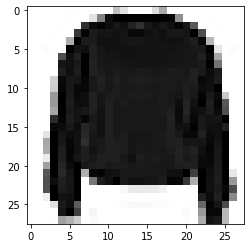

In [29]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

# image 7 = super pull-over 

In [30]:
#imput layer 784 neurones, images 28x28
#hidden layer 128 neurones, choix arbitraire 
#output layers 10 neurones, 10 labels/categories

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10,activation="softmax") 
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [34]:
#entrainement

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 2.5577 - accuracy: 0.6948
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6640 - accuracy: 0.7778
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5828 - accuracy: 0.8043
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5549 - accuracy: 0.8142
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5173 - accuracy: 0.8295


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
print("test accuracy",test_acc) 

#monte a 89% avec epochs = 10

test accuracy 0.8143


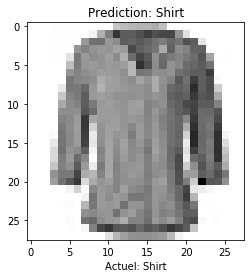

In [44]:
#prediction

prediction = model.predict(test_images)

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel("Actuel: "+ class_names [test_labels[i]])
    plt.title('Prediction: '+ class_names[np.argmax(prediction[i])])

#obtient l'image, la prediction et la vraie catégorie

#### II. Classer les "movies reviews"

In [53]:
#importe les données
data = keras.datasets.imdb


In [49]:
(train_data,train_labels),(test_data,test_labels)= data.load_data(num_words=10000)
#on choisit que les 10000 mots les plus fréquents

In [61]:
word_index = data.get_word_index()
words_index = {k: (v+3) for k,v in word_index.items()}
words_index["<PAD>"] = 0
words_index["<START>"] = 1
words_index["<UNK>"] = 2
words_index["<UNUSED>"]=3

reverse_word_index = dict([(value, key) for (key,value) in words_index.items()])

train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=words_index["<PAD>"],padding ="post",maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=words_index["<PAD>"],padding ="post",maxlen=250)

#decode les données 
def decode_review(text):
    return " ",join ([reverse_word_index.get(i,"?") for i in text])


In [63]:
#Architecture du modele

model = keras.Sequential()
model.add(keras.layers.Embedding(10000,16)) #10000 vecteurs qui "representent" les 10000 mots
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid")) #sigmoide, resultat entre 0 et 1


In [65]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])

In [67]:
x_val=train_data[:10000] #validation data
x_train= train_data[10000:]

y_val=train_labels[:10000] #validation data
y_train= train_labels[10000:]

In [69]:
fitModel = model.fit(x_train, y_train, epochs = 30, batch_size = 512, validation_data =(x_val,y_val), verbose=1) 

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 3s 170us/sample - loss: 0.6924 - accuracy: 0.5419 - val_loss: 0.6912 - val_accuracy: 0.6381
Epoch 2/30
15000/15000 [==============================] - 1s 98us/sample - loss: 0.6889 - accuracy: 0.6943 - val_loss: 0.6862 - val_accuracy: 0.6669
Epoch 3/30
15000/15000 [==============================] - 1s 100us/sample - loss: 0.6805 - accuracy: 0.7176 - val_loss: 0.6750 - val_accuracy: 0.7361
Epoch 4/30
15000/15000 [==============================] - 1s 100us/sample - loss: 0.6639 - accuracy: 0.7513 - val_loss: 0.6553 - val_accuracy: 0.7507
Epoch 5/30
15000/15000 [==============================] - 2s 100us/sample - loss: 0.6375 - accuracy: 0.7755 - val_loss: 0.6267 - val_accuracy: 0.7697
Epoch 6/30
15000/15000 [==============================] - ETA: 0s - loss: 0.6007 - accuracy: 0.79 - 2s 110us/sample - loss: 0.6004 - accuracy: 0.7953 - val_loss: 0.5893 - val_accuracy: 0.7803
Epoch 7/3

In [72]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3062900912666321, 0.87584]
